# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [17]:
%matplotlib inline
# import numpy and pandas
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import linregress
from matplotlib import pyplot as plt


# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [18]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [19]:
# Your code here:
fifa.head()


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [20]:
# Your code here:
def gimme_the_money(value):
    abb = ('k','K')
    value_finder = float(re.findall('[0-9]*\.[0-9]|[0-9]\d*',value)[0])
    if value.endswith(abb):
        money = float(value_finder/1000)
    else:
        money = float(value_finder)
    return money
        

In [21]:
fifa['ValueNumeric'] = fifa['Value'].apply(gimme_the_money)
print(fifa.shape)
fifa.head()

(18207, 21)


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [22]:
# Your code here:

formula = "ValueNumeric ~ C(fifa['Preferred Foot'] + Position) + C(fifa['Preferred Foot']) + C(Position)"
model = ols(formula=formula, data=fifa).fit()


In [23]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(fifa['Preferred Foot']+Position),21883.082186,53.0,13.638317,1.098337e-115
C(fifa['Preferred Foot']),456.556030,1.0,15.080726,1.033759e-04
C(Position),13000.552831,26.0,16.516448,1.118673e-73
Residual,547750.032080,18093.0,NaN,NaN


What is your conclusion from this ANOVA?

# Your conclusions here:

On our current model we cannot accept the null hypothesis since in both cases the pvalue is so small. In the display of the data I've found both fields Preferred foot and Position) are highly dependents. 


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [24]:
# Your code here:
formula_n = "ValueNumeric ~ C(Nationality)"
model_n = ols(formula=formula_n, data=fifa).fit()
anova_table_n = sm.stats.anova_lm(model_n, typ='II')
anova_table_n

,sum_sq,df,F,PR(>F)
C(Nationality),32812.244217,163.0,6.762478,4.840477e-134
Residual,537095.118316,18043.0,NaN,NaN


What is your conclusion from this ANOVA?

We cannot reject the null hypothesis since the pvalue is really low. That means the nationality is highly dependent to the value amount of a player.

===========================================================

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [25]:
# Your code here:
fifa.dropna(axis=0, how='any', inplace=True)
print(fifa.shape)
fifa.head()

(17918, 21)


,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,...,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,ValueNumeric
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,...,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,110.5
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,...,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,77.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,...,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,118.5
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,...,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,72.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,...,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,102.0


Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [29]:
# Your code here:
Y = fifa['SprintSpeed']
X = sm.add_constant(fifa['Stamina'])

model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            SprintSpeed   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                 1.115e+04
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        00:45:26   Log-Likelihood:                -69207.
No. Observations:               17918   AIC:                         1.384e+05
Df Residuals:                   17916   BIC:                         1.384e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5917      0.353     81.054      0.000      27.900      29.283
Stamina        0.5716      0.005    105.610      0.000       0.561       0.582
==============================================================================
Omnibus:                      327.547   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.652
Skew:                          -0.306   Prob(JB):                     7.99e-79
Kurtosis:                       3.328   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how good is our model, is predicted using the r squared. As much this value gets closer to 1, better is the model.

# Your conclusions here:

As the pvalue is very low, and the F-stadistic is zero we cannot reject the null hypothesis. That means the Stamina is related with sprint speed.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [30]:
# Your code here:

Y = fifa['Potential']
X = sm.add_constant(fifa['Stamina'])

model = sm.OLS(Y, X).fit() 
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Potential   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     765.1
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          6.06e-165
Time:                        00:45:36   Log-Likelihood:                -57579.
No. Observations:               17918   AIC:                         1.152e+05
Df Residuals:                   17916   BIC:                         1.152e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.3843      0.184    360.115      0.000      66.023      66.746
Stamina        0.0782      0.003     27.660      0.000       0.073       0.084
==============================================================================
Omnibus:                      212.098   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              219.472
Skew:                           0.270   Prob(JB):                     2.20e-48
Kurtosis:                       2.961   Cond. No.                         267.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how good is our model, is predicted using the r squared. For example, this model is worst than previous model since the r-squared is lower than the previous one since as much this value gets closer to 1, better is the model.

# Your conclusions here:

We cannot reject the null hypothesis since the pvalue is very low. However, the F-stadistics is high, so the distribution is affected by other values.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

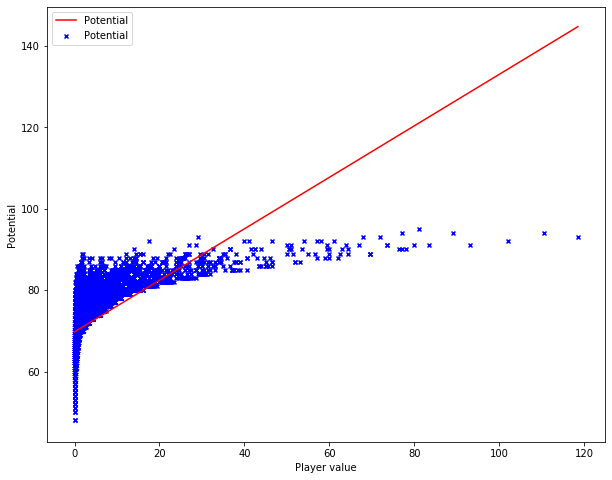

In [31]:
# Your code here:
reg_result = linregress(fifa['ValueNumeric'], fifa['Potential'])
reg_names = ['slope', 'intercept', 'r_value', 'p_value', 'std_err']

x = np.linspace(fifa['ValueNumeric'].min(), fifa['ValueNumeric'].max(), 100)
y = reg_result[1] + reg_result[0] * x



plt.figure(figsize=(10, 8))
plt.plot(x, y, c='r', 
         label='Potential')
plt.scatter(fifa['ValueNumeric'], 
            fifa['Potential'], 
            marker='x', 
            c='b', 
            s=16,
            label='Potential')
plt.xlabel('Player value')
plt.ylabel('Potential')
plt.legend()
plt.show()




I cannot see a linear relationship